## Dataset Reference: 
<a href="https://app.datacamp.com/learn/courses/marketing-analytics-predicting-customer-churn-in-python">Dataset source</a>

**Objectives:**
- One-hot Encoding
- Decision Tree Classification
- Data Transformation
- Cross-Validation
- Grid Search
- Tree diagram of the Decision Tree
- Confusion Matrix, Classification report, and ROC-AUC
- Explaining accuracy, precision, recall, f1 score

### Import required libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
#sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Churn Dataset

In [2]:
df = pd.read_csv("Churn.csv")

display(df.head())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
print(df.shape)

(3333, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
#df.columns

### Data preprocessing

In [6]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())



['no' 'yes']
['no' 'yes']
['yes' 'no']


### Encoding

*As columns like "State", "Area_Code", and "Phone" seem less important, we'll drope these columns. Also "Churn", "Intl_Plan", and "Vmail_Plan", each has only discrete values like "yes" or "no", we can perform OneHot Encoding or simply can replace them with 0 and 1*

In [7]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


(3333, 18)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Checking missing value

In [9]:
#check missing value 
#df.isna().sum()
#df.isnull().sum()

> **There is no missing value in this dataset.**

### Target variable

In [10]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Feature and target variable separation

In [11]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print("Features:" , X.shape)
print("Targets:" , y.shape)

Features: (3333, 17)
Targets: (3333, 1)


### Data Transformation (StandardScaler or MinMaxScaler)

In [12]:
# # normalize the feature columns
# scaler = MinMaxScaler()
scaler = StandardScaler()


for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(5))


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
1704,1.078337,-0.591760,1.812823,0.783329,-1.599328,0.488177,-0.427932,-0.327580,-0.618396,-0.270887,1.813309,-0.507756,0.783398,-0.516604,-1.599330,0.211534,0.484859
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,-0.327580,1.617086,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2173,-1.357862,-0.591760,-2.423375,-0.435456,-0.954629,1.097185,-1.188218,3.052685,-0.618396,0.974997,-2.423007,1.148901,-0.434694,-0.209945,-0.953327,1.024263,1.095214
2986,-0.303013,0.285029,0.151029,-0.979768,0.020329,0.094112,0.332354,-0.327580,1.617086,0.227466,0.150971,0.345673,-0.979935,1.630012,0.022270,-0.601195,0.100070
2409,2.057839,-0.007234,-1.712751,1.660933,-0.404856,-0.550721,0.332354,-0.327580,1.617086,0.925161,-1.712274,-0.156344,1.660423,1.681122,-0.404005,-1.007560,-0.550091


### Observation :

> There is no significant difference in accuracy metrics before and after applying Data Transformation (StandardScaler or MinMaxScaler)

###### *Q.* Is it necessary to standardize or normalize data for tree-based machine learning models?
Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models.
<a href="https://builtin.com/data-science/when-and-why-standardize-your-data">source</a>

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
<a href="https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6">source</a>


### Train test separation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=11, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


In [14]:
print(y_train["Churn"].value_counts())
print(y_test["Churn"].value_counts())

0    2280
1     386
Name: Churn, dtype: int64
0    570
1     97
Name: Churn, dtype: int64


### Stratification 

In [15]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

# train_ratio = class_1_train/class_0_train
# print(train_ratio)

In [16]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

# test_ratio = class_1_test/class_0_test
# print(test_ratio)

### Training: Decision Tree Classifier

In [17]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

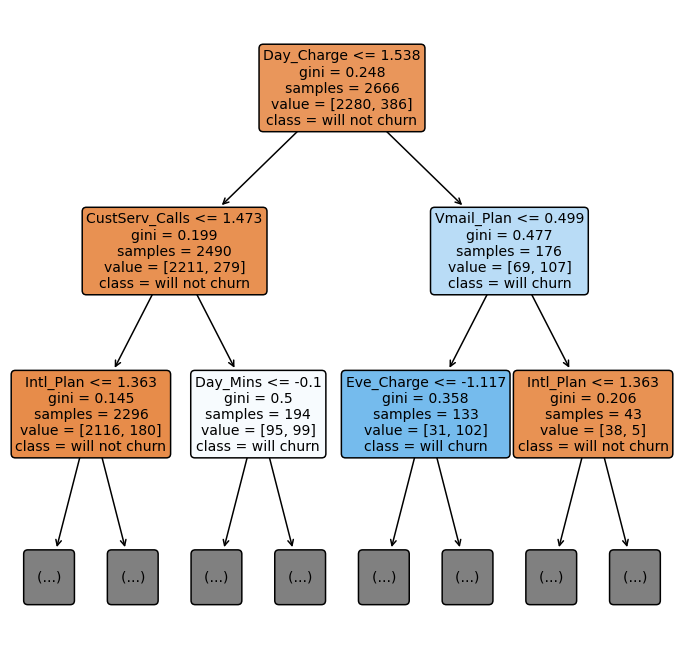

In [18]:
plt.figure(figsize = (12, 12))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=14)

plt.show()

### Prediction

In [19]:
y_pred = model.predict(X_test)


### Prediction Comparison with the test data

In [20]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(5))

,Churn,probability,predicted_Churn
1655,0,0.0,0
3129,0,0.0,0
2167,0,0.0,0
2172,0,0.0,0
1954,1,1.0,1


In [21]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,-0.32758,1.617086,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,0,0.0,0
3175,-1.257400,1.454080,1.779770,0.053635,0.896407,-0.694017,-1.188218,-0.32758,1.617086,1.024832,1.779824,-0.055940,0.052543,-0.618824,0.896791,-0.601195,-0.696046,0,0.0,0
2048,1.580646,1.381014,-0.368626,-0.634643,0.854878,-0.228304,1.092641,-0.32758,1.617086,0.077960,-0.368578,0.646884,-0.634229,1.374463,0.852845,1.836992,-0.231645,0,0.0,0
902,1.203914,-0.591760,-0.241926,0.351429,0.146896,-0.729841,4.133787,-0.32758,-0.618396,-1.965290,-0.242201,0.345673,0.351845,1.578902,0.145318,0.617898,-0.735851,0,0.0,0
1596,-0.956015,2.988460,0.644976,-0.054832,-0.594706,-0.729841,-1.188218,-0.32758,1.617086,-0.719406,0.644595,-0.557958,-0.054185,1.987782,-0.592971,0.211534,-0.735851,0,0.0,0


### Confusion Matrix

In [22]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[536  34]
 [ 26  71]]


In [23]:
y_test['Churn'].value_counts()

0    570
1     97
Name: Churn, dtype: int64

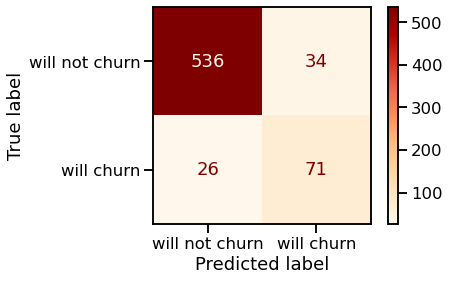

In [24]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test["Churn"], 
                      display_labels=["will not churn", "will churn"],
                      cmap='OrRd')
plt.show()

In [25]:
TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

True Positives =  71
True Negatives =  536
False Positives =  34
False Negatives =  26


### Precision, Recall/Sensitivity/True Positive Rate, F1 score

**Precision:** Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**Recall:** Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**F1 score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support:** Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

#### Accuracy

In [26]:
# calculate the accuracy of the model from the confusion matrix
# accuracy = np.round(((TP+TN)/(TP+FP+FN+TN))*100,2)
# print('Accuracy: ', accuracy)

# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = np.round(accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])*100,2)

print('Accuracy: ', accuracy_)

Accuracy:  91.0


#### Precision, Recall, f1 score

In [27]:
#precision = np.round(TP/(TP+FP), 2)
#recall = np.round(TP/(TP+FN), 2)
#f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)


precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Precision =  0.68
Recall =  0.73
f1 score =  0.7


#### True Positive Rate, False Positive Rate

In [28]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.73
False Positive Rate =  0.06


### ROC: Receiver Operating Characterisitcs
### AUC: Area Under the Curve

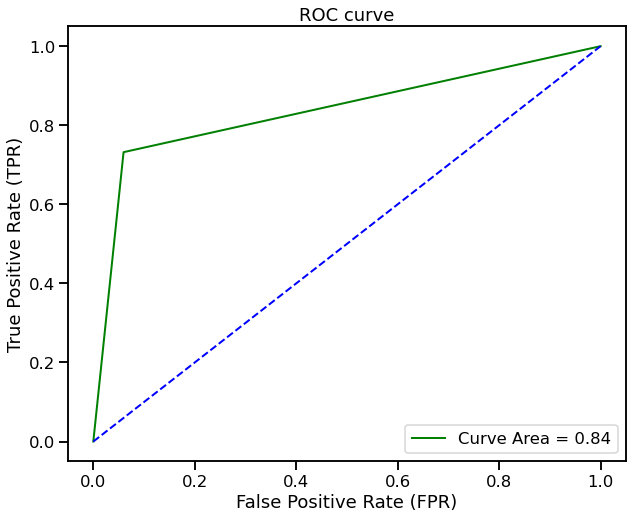

In [29]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.059649,0.731959
2,0.0,1.000000,1.000000


### Classification report

In [31]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       570
           1       0.68      0.73      0.70        97

    accuracy                           0.91       667
   macro avg       0.81      0.84      0.82       667
weighted avg       0.91      0.91      0.91       667



## Observation


> - Accuracy = 91% 
> - Precision = 68%
> - Recall = 73% 
> - F1-score = 70% 
> - Curve area = 0.84


### Grid Search and Cross-Validation with Decision Tree Classifier

In [32]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=11)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)


#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [33]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [34]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [35]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.943820,0.936210,0.936210,0.947467,0.947467,0.942235,0.005096,1
3,gini,6,0.949438,0.936210,0.938086,0.939962,0.934334,0.939606,0.005262,2
4,gini,7,0.951311,0.938086,0.939962,0.934334,0.932458,0.939230,0.006597,3
9,entropy,7,0.941948,0.934334,0.936210,0.939962,0.939962,0.938483,0.002784,4
2,gini,5,0.947566,0.928705,0.924953,0.949343,0.934334,0.936980,0.009849,5
7,entropy,5,0.953184,0.930582,0.921201,0.943715,0.936210,0.936978,0.010940,6
6,entropy,4,0.921348,0.915572,0.915572,0.913696,0.919325,0.917103,0.002802,7
1,gini,4,0.921348,0.917448,0.909944,0.915572,0.919325,0.916727,0.003898,8
0,gini,3,0.904494,0.906191,0.902439,0.896811,0.900563,0.902100,0.003254,9
5,entropy,3,0.904494,0.894934,0.902439,0.896811,0.896811,0.899098,0.003690,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model performance evaluation with the best found model in grid search and cross-validation

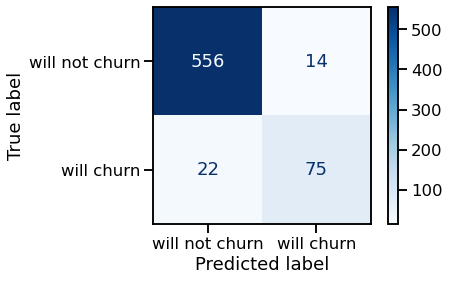

In [36]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Blues')
plt.show()

In [37]:
confusion_matrix_dt = confusion_matrix(y_test['Churn'], y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test['Churn'], y_pred))

print(classification_report(y_test['Churn'], y_pred))

confusion_matrix: 
 [[556  14]
 [ 22  75]]
Accuracy:  0.9460269865067467
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.84      0.77      0.81        97

    accuracy                           0.95       667
   macro avg       0.90      0.87      0.89       667
weighted avg       0.94      0.95      0.95       667



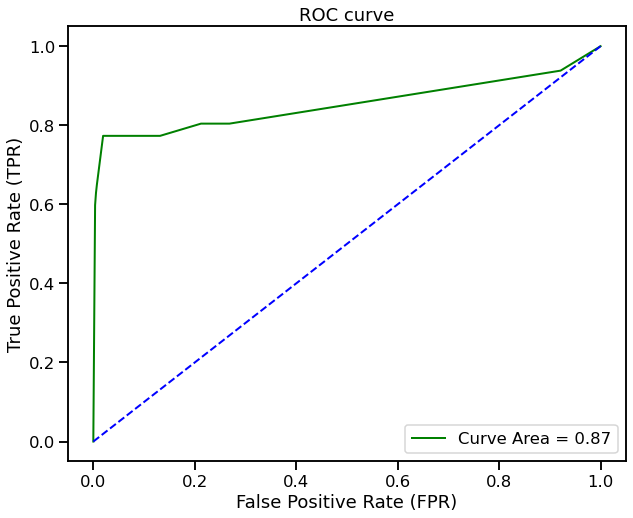

In [38]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Observation


After applying grid search and cross-validation :
> - Accuracy = 95% 
> - Precision = 84%
> - Recall = 77% 
> - F1-score = 81% 
> - Curve area = 0.87